In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("50_Startups .csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
sayisal_sutunlar=["R&D Spend","Administration","Marketing Spend","Profit"]
sayisal_olmayan=["State"]

In [6]:
df[sayisal_sutunlar].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


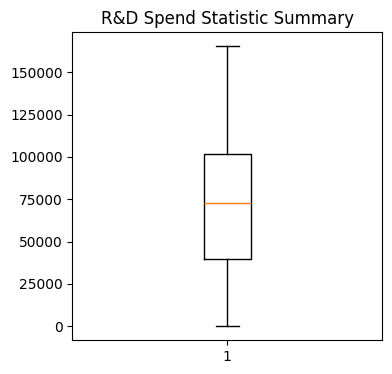

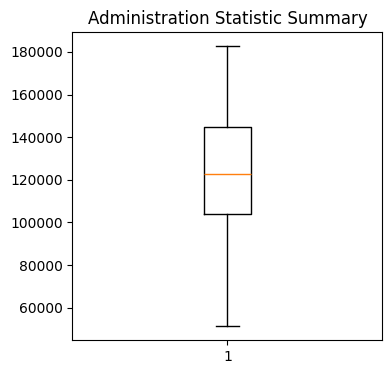

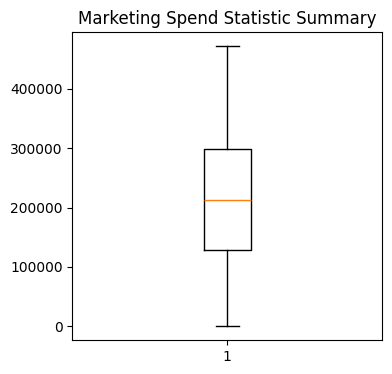

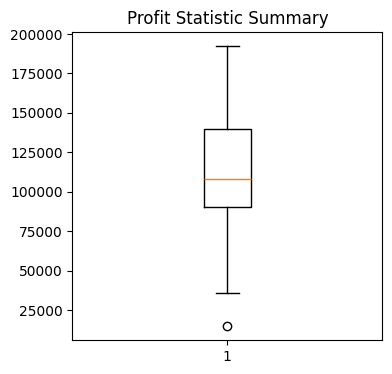

In [8]:
for i in sayisal_sutunlar:
    fig, ax = plt.subplots(figsize=(4,4))
    ax.boxplot(df[i])
    ax.set_title(i+' Statistic Summary')
plt.show()

In [9]:
def tukeys(data,columns):
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_f = Q1 - (1.5 * IQR)
    upper_f = Q3 + (1.5 * IQR)
    df_no_outliers = df[(df[columns] >= lower_f) & (df[columns] <= upper_f)]
    return df_no_outliers

df = tukeys(df, 'Profit')


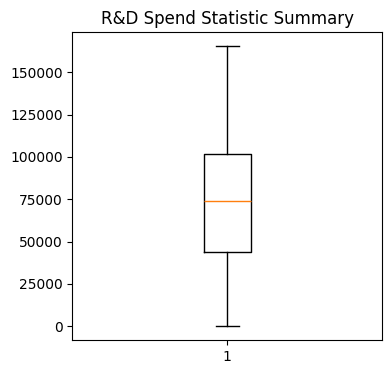

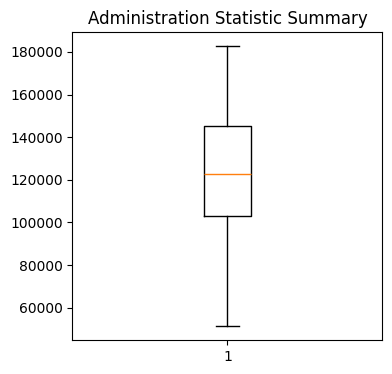

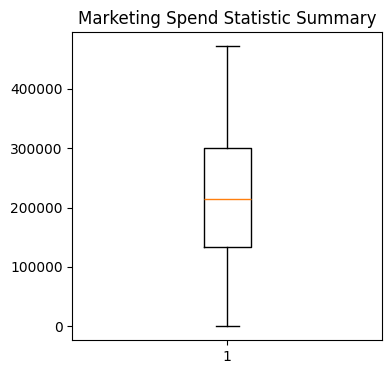

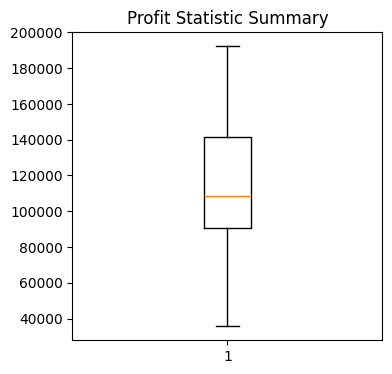

In [10]:
for i in sayisal_sutunlar:
    fig, ax = plt.subplots(figsize=(4,4))
    ax.boxplot(df[i])
    ax.set_title(i+' Statistic Summary')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

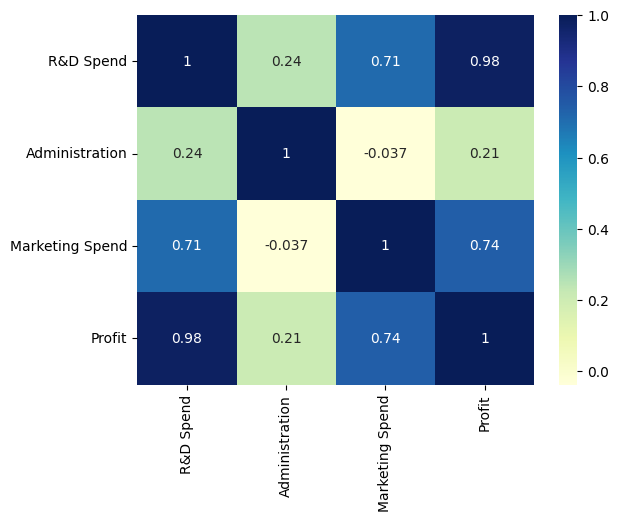

In [11]:
sns.heatmap(df[sayisal_sutunlar].corr(),annot=True,cmap="YlGnBu")
plt.show

In [12]:
import plotly.figure_factory as ff
fig = ff.create_scatterplotmatrix(df, diag='histogram', index='Profit',
    height=800, width=800)
fig.show()

In [13]:
import plotly.graph_objs as go
pie_labels = df['State'].value_counts().keys()
pie_values = df['State'].value_counts().values
pie = go.Figure(data=[go.Pie(labels = pie_labels,values = pie_values)])
(pie)

In [14]:
dummy_variables = pd.get_dummies(df,columns=["State"],drop_first=True)
df = dummy_variables.apply(lambda x: x.astype(int))

In [15]:
from sklearn.preprocessing import MinMaxScaler
# Scale the data with `MinMaxScaler`
scaler = MinMaxScaler()
scaler = scaler.fit(df[["R&D Spend","Administration","Marketing Spend"]])
scaled = scaler.fit_transform(df[["R&D Spend","Administration","Marketing Spend"]])
df_scaled = pd.DataFrame(scaled,columns=[["R&D Spend","Administration","Marketing Spend"]])

In [16]:
X = df_scaled.copy()
X[["State_Florida","State_New York"]]=df[["State_Florida","State_New York"]]
y = df["Profit"]

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X , y , test_size=0.27,random_state=0)


In [18]:
from sklearn.svm import SVR
model= SVR()
model.fit(X_train,y_train)

SVR()

In [19]:
tranin_data_prediction = model.score(X_train,y_train)
test_data_prediction = model.score(X_test,y_test)
print(tranin_data_prediction,test_data_prediction)

-0.005593303179491027 -0.003504347645849837


In [20]:
svm_param_grid = {
 "kernel": ['linear', 'poly', 'rbf','sigmoid'],
 "C": [10000,100000,200000,210000],
 "gamma": [10,1, 0.1, 0.01, 0.001]
}

In [21]:
from sklearn.model_selection import GridSearchCV
model_cv = SVR()
grid_search = GridSearchCV(model_cv,svm_param_grid,cv=10,n_jobs=-1,scoring="neg_mean_squared_error")

In [22]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [10000, 100000, 200000, 210000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [23]:
grid_search.best_estimator_

SVR(C=200000, gamma=10, kernel='linear')

In [24]:
grid_search.best_score_

-115671078.52030548

In [25]:
from sklearn.metrics import mean_squared_error as MSE

y_train_pred_tuned = grid_search.predict(X_train)

rmse_train = MSE(y_train, y_train_pred_tuned)**(1/2)
print('Test set RMSE for train: {}'.format(rmse_train))

Test set RMSE for train: 8383.31119430714


In [26]:

y_test_pred_tuned = grid_search.predict(X_test)

rmse_test = MSE(y_test, y_test_pred_tuned)**(1/2)

print('Test set RMSE for test: {}'.format(rmse_test))

Test set RMSE for test: 6197.562604257492


In [27]:
tuned_pred_train=grid_search.predict(X_train)
train_pred=pd.DataFrame(tuned_pred_train,columns=['tahmin_edilen_kar'])

In [28]:
train_y = pd.DataFrame(y_train.values,columns=['gerçekleşen_kar'])

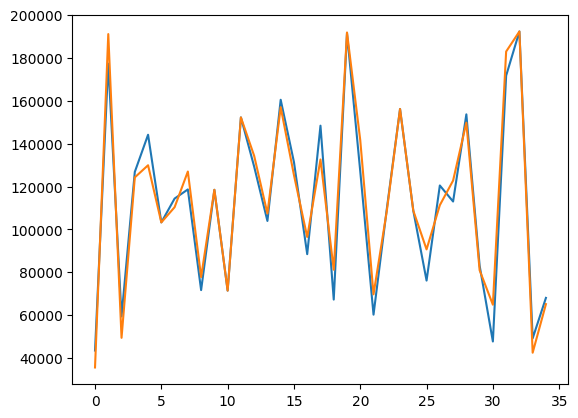

In [29]:
fig,ax=plt.subplots()
ax.plot(train_pred, label='Train Prediction')
ax.plot(train_y, label='Train Actual')
plt.show()

In [30]:
tuned_pred_test=grid_search.predict(X_test)
test_pred=pd.DataFrame(tuned_pred_test,columns=['tahmin_edilen_kar'])
test_y = pd.DataFrame(y_test.values,columns=['gerçekleşen_kar'])

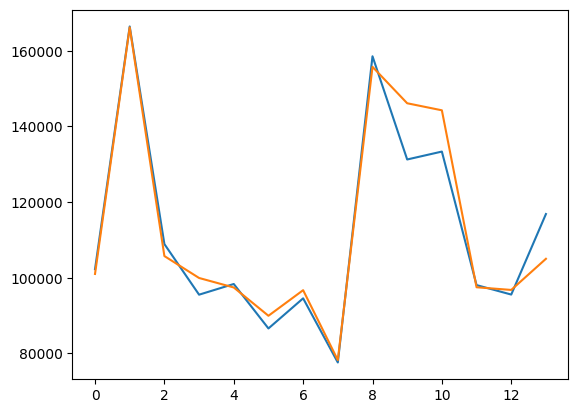

In [31]:
fig,ax=plt.subplots()
ax.plot(test_pred)
ax.plot(test_y)